# 8. Keras로 다중선형회귀 모델 구축하기

6월, 9월 모의평가 성적을 바탕으로 수능 성적 예측하는 프로그램 만들기

In [80]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sb
import random
tf.compat.v1.disable_eager_execution()

In [81]:
import warnings
warnings.filterwarnings(action = 'ignore')

## 데이터 준비
6월, 9월 모평 성적에 각각 2:3의 비율로 가중치를 설정하여 수능 성적 세팅

In [82]:
df = pd.read_csv('Tables/score.csv')
        
x = []
y = []

for i, rows in df.iterrows():
    x.append([rows['JUNE'], rows['SEPT']])

y = df['KSAT'].values

## 데이터 시각화

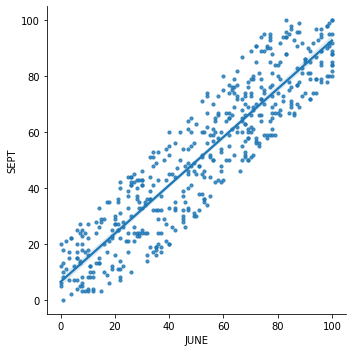

In [83]:
sb.lmplot('JUNE', 'SEPT', data = df, fit_reg = True, scatter_kws = {"s" : 10})

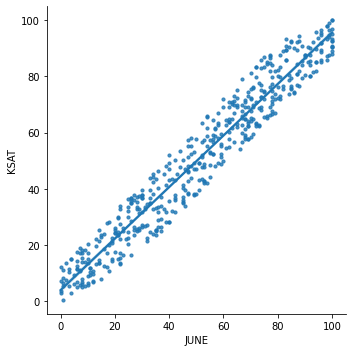

In [52]:
sb.lmplot('JUNE', 'KSAT', data = df, fit_reg = True, scatter_kws = {"s" : 10})

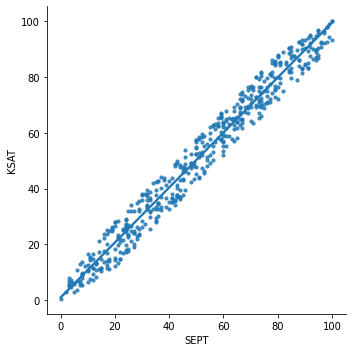

In [53]:
sb.lmplot('SEPT', 'KSAT', data = df, fit_reg = True, scatter_kws = {"s" : 10})

## 모델 구성 및 학습

In [73]:
# 레이어 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu'),
])

# 컴파일(모델 학습 과정 설정)
model.compile(optimizer='adam', loss='mse')

# 학습
model.fit(np.array(x), np.array(y), epochs=100, verbose=0)

## 예측 결과 출력

In [79]:
# 넘파이 배열에서 예측값 추출
for i in model.predict(np.array([[50, 20]])):
    for j in i:
        print(j)

31.985714
